<a href="https://colab.research.google.com/github/emicervantes/wound_classification/blob/main/wound_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

#### Load wound data

In [23]:
X = np.load('wound_features.npy', encoding = 'bytes')
Y = np.load('wound_label.npy', encoding = 'bytes')

In [158]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

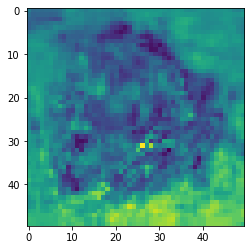

In [159]:
plt.imshow(x_train[3,:,:,0])

In [160]:
len(np.unique(Y))

6

#### CNN Using Keras

In [25]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

model.fit(X, Y, batch_size = 32, epochs = 10, validation_split = 0.1)

Epoch 1/10
21/21 [==============================] - 5s 201ms/step - loss: 0.0000e+00 - accuracy: 0.2063 - val_loss: 0.0000e+00 - val_accuracy: 0.2297
Epoch 2/10
21/21 [==============================] - 4s 196ms/step - loss: 0.0000e+00 - accuracy: 0.2063 - val_loss: 0.0000e+00 - val_accuracy: 0.2297
Epoch 3/10
21/21 [==============================] - 4s 186ms/step - loss: 0.0000e+00 - accuracy: 0.2063 - val_loss: 0.0000e+00 - val_accuracy: 0.2297
Epoch 4/10
21/21 [==============================] - 4s 191ms/step - loss: 0.0000e+00 - accuracy: 0.2063 - val_loss: 0.0000e+00 - val_accuracy: 0.2297
Epoch 5/10
21/21 [==============================] - 4s 201ms/step - loss: 0.0000e+00 - accuracy: 0.2063 - val_loss: 0.0000e+00 - val_accuracy: 0.2297
Epoch 6/10
21/21 [==============================] - 4s 187ms/step - loss: 0.0000e+00 - accuracy: 0.2063 - val_loss: 0.0000e+00 - val_accuracy: 0.2297
Epoch 7/10
21/21 [==============================] - 4s 188ms/step - loss: 0.0000e+00 - accuracy: 0.2

### CNN Using Torch

In [80]:
# Check GPU avialbility
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [161]:
torch_XTr = torch.tensor(x_train)
torch_YTr = torch.tensor(y_train)
torch_XTe = torch.tensor(x_test)
torch_YTe = torch.tensor(y_test)

In [163]:
torch_XTr.shape

torch.Size([516, 50, 50, 3])

In [167]:
torch_XTr = torch.swapaxes(torch_XTr, 1,3)
torch_XTr.shape

torch.Size([516, 3, 50, 50])

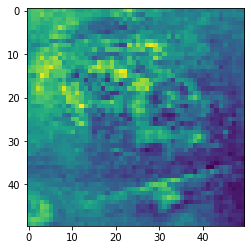

In [171]:
plt.imshow(torch_XTr[100,0,:,:])

In [172]:
# Hyper parameters
num_epochs = 5
num_classes = 6
batch_size = 100
learning_rate = 0.001

In [134]:
# CNN
class ConvNet(nn.Module):
  def __init__(self, num_classes = 6):
    super(ConvNet, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(3, 16, kernel_size = 5, stride = 1, padding = 2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(16, 32, kernel_size = 5, stride = 1, padding = 2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)  
    )
    self.fc = nn.Linear(4608, num_classes)

  def forward(self, x):
    out = self.layer1(x.float())
    print(out.shape)
    out = self.layer2(out)
    print(out.shape)
    out = out.reshape(out.size(0), -1)
    out = self.fc(out)
    return out

In [173]:
model = ConvNet(num_classes)
output = model(torch_XTr)

torch.Size([516, 16, 25, 25])
torch.Size([516, 32, 12, 12])


In [140]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)